### This machine learning model has been developed from the following link
### https://towardsdatascience.com/galaxy-multi-image-classification-with-lenet-5-1bc2f66d3cfc
### How to build a machine learning model that classifies galaxies!

In [1]:
! pip install astroNN
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from tensorflow import keras

from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, Flatten, Dense, Dropout
from keras.callbacks import ReduceLROnPlateau
from keras.optimizers import Adam

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras import utils

from astroNN.datasets import galaxy10
from astroNN.datasets.galaxy10 import galaxy10cls_lookup

     |████████████████████████████████| 9.3MB 6.7MB/s 
     |████████████████████████████████| 3.9MB 38.9MB/s 
     |████████████████████████████████| 808kB 38.9MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
     |████████████████████████████████| 3.2MB 40.5MB/s 
  Created wheel for astroNN: filename=astroNN-1.0.1-cp37-none-any.whl size=9284594 sha256=c21ba39deda48c80378ef81837e6e91f35bf40e979c603b4e8ae5dedf08238c0
  Stored in directory: /root/.cache/pip/wheels/22/48/89/bcbab7475e4bff84e86a914145ea3ba907b6afb63f9fbe04b0
  Created wheel for pyvo: filename=pyvo-1.1-cp37-none-any.whl size=801573 sha256=e2d5384d74e1822eda559a7d3a003f4d22af881ace2f8b81b5ee6c71e3b1567f
  Stored in directory: /root/.cache/pip/wheels/d9/00/df/656aac56938f1c83dfcb361346f74101ce1f8c849fc93b18dc
  Created wheel for mimeparse: filename=mimeparse-0.1.3-cp37-none-any.whl size=3864 sha256=26d2509a15ad0e4de6823f41e5914f7526e1d672cbf760bf2ca0ccbd0b186f1f
  Stored in directory: /root/.cache/pip/wheels/54/ca

In [2]:
images, labels = galaxy10.load_data()

Galaxy10.h5:  99%|█████████▉| 208M/210M [00:02<00:00, 80.8MB/s]

Downloaded Galaxy10 successfully to /root/.astroNN/datasets/Galaxy10.h5


Galaxy10.h5: 210MB [00:03, 57.8MB/s]                           


In [3]:
images

array([[[[16, 18, 15],
         [18, 20, 15],
         [16, 17, 12],
         ...,
         [ 6,  6,  4],
         [ 9,  9,  7],
         [ 6,  6,  4]],

        [[19, 24, 20],
         [23, 25, 20],
         [17, 18, 13],
         ...,
         [ 8,  5,  3],
         [10,  8,  6],
         [ 6,  6,  4]],

        [[17, 22, 18],
         [21, 24, 19],
         [17, 18, 13],
         ...,
         [ 8,  4,  3],
         [11,  8,  7],
         [ 7,  6,  4]],

        ...,

        [[17, 14,  7],
         [18, 17,  9],
         [15, 14,  7],
         ...,
         [ 2,  4,  0],
         [ 3,  5,  0],
         [ 5,  7,  2]],

        [[22, 14, 11],
         [19, 14,  8],
         [12,  9,  3],
         ...,
         [ 4,  7,  0],
         [ 6,  9,  2],
         [ 7, 10,  3]],

        [[30, 12, 11],
         [31, 14,  8],
         [24,  9,  2],
         ...,
         [ 8, 11,  3],
         [11, 14,  6],
         [12, 15,  7]]],


       [[[ 1,  3,  0],
         [ 1,  1,  1],
         [ 1, 

In [4]:
labels

array([2, 2, 4, ..., 2, 9, 2], dtype=uint8)

In [5]:
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.2)

In [8]:
features = ['Disk, Face-on, No Spiral', 'Smooth, Completely round', 'Smooth, in-between round', 'Smooth, Cigar shaped', 'Disk, Edge-on, Rounded Bulge', 'Disk, Edge-on, Boxy Bulge', 
            'Disk, Edge-on, No Bulge','Disk, Face-on, Tight Spiral', 'Disk, Face-on, Medium Spiral', 'Disk, Face-on, Loose Spiral']

In [9]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [10]:
x_train.shape

(17428, 69, 69, 3)

In [11]:
x_test.shape

(4357, 69, 69, 3)

In [12]:
fig = plt.figure(figsize=(20,20)) 


<Figure size 1440x1440 with 0 Axes>

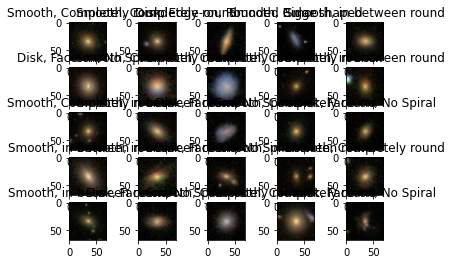

In [13]:
for i in range(25):
    plt.subplot(5,5,i+1)    
    plt.imshow(x_train[i])
    plt.title(features[y_train[i]])
    fig.tight_layout(pad=3.0)
    
plt.show()

In [14]:
df = pd.DataFrame(data=labels)

counts = df.value_counts().sort_index()
print(counts)

0    3461
1    6997
2    6292
3     349
4    1534
5      17
6     589
7    1121
8     906
9     519
dtype: int64


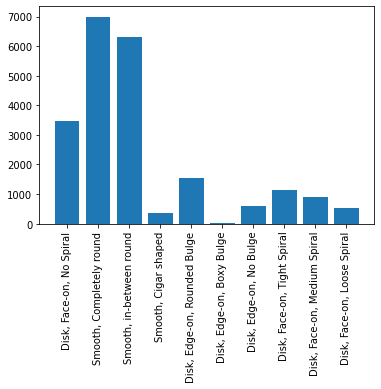

In [15]:
def class_distribution(x, y, labels):
    fig, ax = plt.subplots()
    ax.bar(x, y)
    ax.set_xticklabels(labels, rotation=90)
    plt.show()
    
class_distribution(features, counts, features)

In [16]:
model = Sequential()

In [17]:
# Baseline model to compare to LeNet-5
model.add(Flatten(input_shape=(69, 69, 3)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [18]:
model_optimizer = Adam(lr=0.001)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [19]:
model.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")
lol = model.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 23s 15ms/step - loss: 1.6734 - accuracy: 0.3610
Epoch 2/10
545/545 [==============================] - 8s 15ms/step - loss: 1.1675 - accuracy: 0.5759
Epoch 3/10
545/545 [==============================] - 8s 15ms/step - loss: 0.9985 - accuracy: 0.6461
Epoch 4/10
545/545 [==============================] - 8s 15ms/step - loss: 0.9428 - accuracy: 0.6637
Epoch 5/10
545/545 [==============================] - 8s 15ms/step - loss: 0.8893 - accuracy: 0.6849
Epoch 6/10
545/545 [==============================] - 8s 15ms/step - loss: 0.8502 - accuracy: 0.6971
Epoch 7/10
545/545 [==============================] - 8s 15ms/step - loss: 0.8203 - accuracy: 0.7133
Epoch 8/10
545/545 [==============================] - 8s 15ms/step - loss: 0.8054 - accuracy: 0.7120
Epoch 9/10
545/545 [==============================] - 8s 15ms/step - loss: 0.7942 - accuracy: 0.7267
Epoch 10/10
545/545 [==============================] - 8s 14ms/step - loss: 0.7598 - accur

In [20]:
model2 = Sequential()

In [21]:
# LeNet-5 conv-net architecture
model2.add(Conv2D(filters=6, kernel_size=(5,5), strides=(1,1), activation='tanh', input_shape=(69,69,3)))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))
model2.add(Conv2D(filters=16, kernel_size=(5,5), strides=(1,1), activation='tanh'))
model2.add(AveragePooling2D(pool_size=(2,2), strides=(2,2)))

In [22]:
model2.add(Flatten())
model2.add(Dense(units=120, activation='tanh'))
model2.add(Dense(units=84, activation='tanh'))
model2.add(Dense(units=10, activation='softmax'))

In [23]:
model_optimizer = Adam(lr=0.001)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [24]:
reduceLR = ReduceLROnPlateau(monitor='accuracy', factor=.001, patience=1, min_delta=0.01, mode="auto")

In [25]:
model2.compile(optimizer=model_optimizer, loss='sparse_categorical_crossentropy', metrics=["accuracy"])
model2.fit(x_train, y_train, epochs=10, callbacks=[reduceLR])

Epoch 1/10
545/545 [==============================] - 71s 127ms/step - loss: 1.5192 - accuracy: 0.4059
Epoch 2/10
545/545 [==============================] - 69s 127ms/step - loss: 0.9124 - accuracy: 0.6737
Epoch 3/10
545/545 [==============================] - 69s 127ms/step - loss: 0.7729 - accuracy: 0.7146
Epoch 4/10
545/545 [==============================] - 69s 127ms/step - loss: 0.6675 - accuracy: 0.7533
Epoch 5/10
545/545 [==============================] - 69s 127ms/step - loss: 0.5824 - accuracy: 0.7937
Epoch 6/10
545/545 [==============================] - 69s 127ms/step - loss: 0.5257 - accuracy: 0.8104
Epoch 7/10
545/545 [==============================] - 69s 127ms/step - loss: 0.4497 - accuracy: 0.8405
Epoch 8/10
545/545 [==============================] - 69s 127ms/step - loss: 0.3861 - accuracy: 0.8632
Epoch 9/10
545/545 [==============================] - 69s 127ms/step - loss: 0.3365 - accuracy: 0.8812
Epoch 10/10
545/545 [==============================] - 69s 127ms/step - l

In [26]:
predict = model2.predict(x_test).argmax(axis=1)

for i in range(10):
    print("Actual:", features[y_test[i]])
    print("Prediction:", features[np.argmax(predict[i])])
    print("-----")
    print()

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Face-on, No Spiral
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Disk, Edge-on, Rounded Bulge
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, Cigar shaped
Prediction: Disk, Face-on, No Spiral
-----

Actual: Smooth, in-between round
Prediction: Disk, Face-on, No Spiral
-----



In [27]:
classification_report(y_test, predict)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.45      0.59      0.51       679\n           1       0.90      0.87      0.88      1428\n           2       0.84      0.82      0.83      1269\n           3       0.52      0.57      0.54        60\n           4       0.79      0.79      0.79       315\n           5       0.00      0.00      0.00         3\n           6       0.67      0.72      0.70       122\n           7       0.43      0.26      0.33       212\n           8       0.48      0.30      0.37       180\n           9       0.32      0.37      0.34        89\n\n    accuracy                           0.73      4357\n   macro avg       0.54      0.53      0.53      4357\nweighted avg       0.74      0.73      0.73      4357\n'

Text(33.0, 0.5, 'True class')

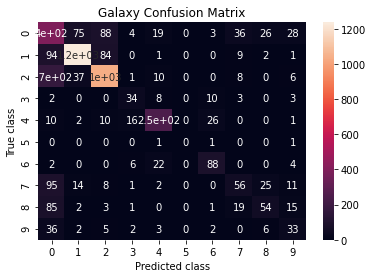

In [28]:
matrix = confusion_matrix(y_test, predict)
sns.heatmap(matrix, annot=True)
plt.title('Galaxy Confusion Matrix')
plt.xlabel('Predicted class')
plt.ylabel('True class')